In [ ]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.cm as cm
import matplotlib as mpl
import random


In [ ]:
cmap = cm.get_cmap('viridis')
saltos = np.linspace(0, 2, 15)
colores = cmap(saltos)

In [ ]:
entrenamiento = pd.read_csv('/content/drive/My Drive/Entrenamieto_ECI_2020.csv')
entrenamiento.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/30/2016,6/13/2016,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.52,USD,0.58817,5/1/2016,6/30/2016,2016 - 5,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/20/2016,1/15/2016,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.53,USD,0.59948,1/18/2016,1/20/2016,2016 - 1,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,12/8/2015,None,None,None,None,None,None,NaT,9/30/2016,9/29/2016,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.48,USD,0.48000,1/25/2016,1/25/2016,2016 - 1,Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_415,3,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,NaT,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2/1/2018,3/31/2018,2018 - 2,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_851,4,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,6/2/2017,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2/1/2018,2/28/2018,2018 - 2,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None


Permisos de Envio:

In [ ]:
necesita_aprobacion = entrenamiento[entrenamiento['Pricing, Delivery_Terms_Quote_Appr']== 1]
no_necesita_aprobacion = entrenamiento[entrenamiento['Pricing, Delivery_Terms_Quote_Appr']== 0]

In [ ]:
no_necesita_aprobacion_o = no_necesita_aprobacion.groupby('Stage').agg({'ID':'count'})
no_necesita_aprobacion_o = no_necesita_aprobacion_o.rename(columns = {'ID':'Oportunidades'})
no_necesita_aprobacion_o.reset_index()

,Stage,Oportunidades
0,Closed Lost,1136
1,Closed Won,2118


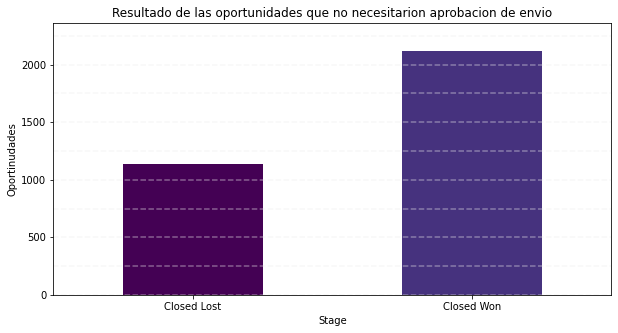

In [ ]:
graf1 = no_necesita_aprobacion_o['Oportunidades'].plot(kind='bar', figsize=(10,5), rot=360, title='Resultado de las oportunidades que no necesitarion aprobacion de envio', color=colores)
ax = plt.gca()
ax.set_ylabel('Oportinudades')
ax.set_xlabel('Stage')
lineas = graf1.get_yticks()
for i in lineas:
      graf1.axhline(y=i, linestyle='--', alpha=0.4, color='#eeeeee')


In [ ]:
fue_aprobada = necesita_aprobacion[necesita_aprobacion['Pricing, Delivery_Terms_Approved'] == 1]
fue_aprobada

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/30/2016,6/13/2016,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.5200,USD,0.58817,5/1/2016,6/30/2016,2016 - 5,Q2,2016,NaT,10,EUR,5272800.00,EUR,5272800.0,Closed Lost,Prod_Category_A_None
7,27455,Americas,NW America,1,1,1,1,0,Bureaucratic_Code_4,4/21/2015,Source_7,United States,Account_Name_1794,Opportunity_Name_8227,7,None,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,12/9/2015,None,None,None,None,None,None,NaT,1/7/2016,12/9/2015,Person_Name_8,Product_Family_143,Product_Name_251,USD,0.4800,USD,0.48000,1/25/2016,1/25/2016,2016 - 1,Q1,2016,NaT,0,USD,50688.00,USD,50688.0,Closed Won,Prod_Category_A_None
23,28524,APAC,India,1,1,1,1,0,Bureaucratic_Code_4,10/13/2015,None,India,Account_Name_1147,Opportunity_Name_7036,11,25,Person_Name_60,Person_Name_49,Account_Type_2,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/9/2015,None,None,None,None,None,None,NaT,3/31/2016,1/7/2016,Person_Name_49,Product_Family_73,Product_Name_84,USD,0.5390,USD,0.53900,1/9/2016,1/15/2016,2016 - 1,Q1,2016,NaT,3,USD,1621851.00,USD,1621851.0,Closed Won,Prod_Category_A_None
24,4915,APAC,India,1,1,0,0,0,Bureaucratic_Code_4,12/9/2015,None,None,Account_Name_423,Opportunity_Name_3858,12,None,Person_Name_49,Person_Name_49,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_1,12/9/2015,None,None,None,None,None,None,NaT,3/31/2016,3/30/2016,Person_Name_49,Product_Family_77,Product_Name_100,USD,0.5500,USD,0.55000,1/18/2016,1/31/2016,2016 - 1,Q1,2016,NaT,0,USD,221650.00,USD,221650.0,Closed Lost,Prod_Category_A_None
62,18557,EMEA,Italy,1,1,1,1,0,Bureaucratic_Code_4,7/27/2013,Source_7,Italy,Account_Name_1067,Opportunity_Name_9078,19,None,Person_Name_2,Person_Name_39,Account_Type_0,Opportunity_Type_7,Non Binding,Delivery_Terms_2,12/9/2015,None,None,None,None,None,None,NaT,12/23/2015,10/28/2016,Person_Name_4,Product_Family_164,Product_Name_310,EUR,0.5500,USD,0.62210,4/11/2016,4/15/2016,2016 - 4,Q2,2016,NaT,0,EUR,259875.00,EUR,259875.0,Closed Lost,Prod_Category_A_None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,8781,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,Source_7,Austria,Account_Name_726,Opportunity_Name_9245,12801,44,Person_Name_13,Person_Name_13,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/4/2015,None,None,None,None,None,None,NaT,NaT,1/19/2016,Person_Name_13,Product_Family_85,Product_Name_111,EUR,0.5200,USD,0.58817,3/21/2016,3/25/2016,2016 - 3,Q1,2016,NaT,0,EUR,103350.00,EUR,299715.0,Closed Won,Prod_Category_A_None
16943,8786,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,Source_7,Austria,Account_Name_726,Opportunity_Name_9245,12801,44,Person_Name_13,Person_Name_13,Account_Type_5,Opportunity_Type_1,Non Binding,De

In [ ]:
fue_aprobada_o = fue_aprobada.groupby('Stage').agg({'ID':'count'})
fue_aprobada_o = fue_aprobada_o.rename(columns = {'ID':'Oportunidades'})
fue_aprobada_o.reset_index()

,Stage,Oportunidades
0,Closed Lost,3443
1,Closed Won,6404
2,Negotiation,17
3,Proposal,26


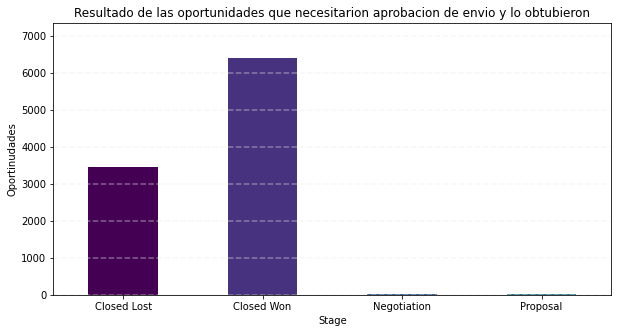

In [ ]:
graf2 = fue_aprobada_o['Oportunidades'].plot(kind='bar', figsize=(10,5), rot=360, title='Resultado de las oportunidades que necesitarion aprobacion de envio y lo obtubieron', color= colores)
ax = plt.gca()
ax.set_ylabel('Oportinudades')
ax.set_xlabel('Stage')
lineas = graf2.get_yticks()
for i in lineas:
      graf2.axhline(y=i, linestyle='--', alpha=0.4, color='#eeeeee')

In [ ]:
no_fue_aprobada = necesita_aprobacion[necesita_aprobacion['Pricing, Delivery_Terms_Approved'] == 0]
no_fue_aprobada

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_415,3,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,NaT,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2/1/2018,3/31/2018,2018 - 2,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_851,4,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,6/2/2017,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2/1/2018,2/28/2018,2018 - 2,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None
5,16802,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_939,5,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,6/2/2017,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2/1/2018,3/31/2018,2018 - 2,Q1,2018,NaT,28,USD,14838277.5,USD,14838277.5,Closed Lost,Prod_Category_A_None
6,16799,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_1618,6,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_4,12/8/2015,None,None,None,None,None,None,NaT,NaT,10/7/2016,Person_Name_8,Product_Family_164,Product_Name_308,USD,0.38,USD,0.38000,2/1/2017,5/1/2017,2017 - 2,Q1,2017,NaT,7,USD,2659494.6,USD,2659494.6,Closed Lost,Prod_Category_A_None
8,24353,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,4/20/2015,None,Japan,Account_Name_1888,Opportunity_Name_6151,8,None,Person_Name_50,Person_Name_50,Account_Type_2,Opportunity_Type_7,Non Binding,Delivery_Terms_4,12/9/2015,None,None,None,None,None,None,NaT,NaT,4/5/2016,Person_Name_50,Product_Family_6,Product_Name_6,JPY,NaN,USD,NaN,2/29/2016,2/29/2016,2016 - 2,Q1,2016,NaT,0,JPY,15600.0,JPY,470400.0,Closed Lost,Prod_Category_A_None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16906,24693,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,4/20/2015,None,Japan,Account_Name_1888,Opportunity_Name_12292,12780,5,Person_Name_50,Person_Name_50,Account_Type_2,Opportunity_Type_7,Non Binding,Delivery_Terms_4,12/1/2015,None,None,None,None,None,None,NaT,1/6/2016,1/7/2016,Person_Name_50,Product_Family_77,Product_Name_100,JPY,78.00,USD,0.70125,1/8/2016,1/8/2016,2016 - 1,Q1,2016,NaT,0,JPY,344760.0,JPY,518760.0,Closed Won,Prod_Category_A_None
16930,28372,Americas,SE America,1,0,1,0,0,Bureaucratic_Code_5,9/25/2015,Source_7,United States,Account_Name_

In [ ]:
no_fue_aprobada_o = no_fue_aprobada.groupby('Stage').agg({'ID':'count'})
no_fue_aprobada_o = no_fue_aprobada_o.rename(columns = {'ID':'Oportunidades'})
no_fue_aprobada_o.reset_index()

,Stage,Oportunidades
0,Closed Lost,2771
1,Closed Won,1011
2,Negotiation,1
3,Proposal,9
4,Qualification,11


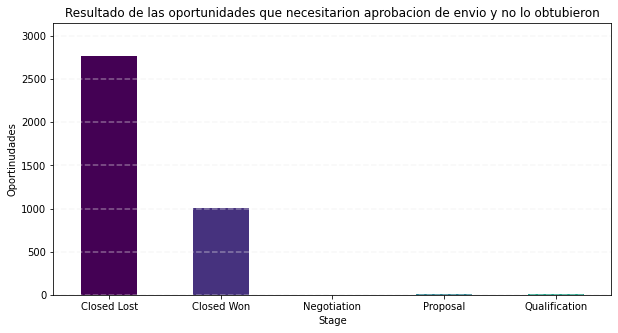

In [ ]:
graf3 = no_fue_aprobada_o['Oportunidades'].plot(kind='bar', figsize=(10,5), rot=360, title='Resultado de las oportunidades que necesitarion aprobacion de envio y no lo obtubieron', color=colores)
ax = plt.gca()
ax.set_ylabel('Oportinudades')
ax.set_xlabel('Stage')
lineas = graf3.get_yticks()
for i in lineas:
      graf3.axhline(y=i, linestyle='--', alpha=0.4, color='#eeeeee')

Permisos Burocraticos:

In [ ]:
burocracia_si = entrenamiento[entrenamiento['Bureaucratic_Code_0_Approval']==1]
burocracia_no = entrenamiento[entrenamiento['Bureaucratic_Code_0_Approval']==0]

In [ ]:
burocracia_no_o = burocracia_no.groupby('Stage').agg({'ID':'count'})
burocracia_no_o = burocracia_no_o.rename(columns = {'ID':'Oportunidades'})
burocracia_no_o.reset_index()

,Stage,Oportunidades
0,Closed Lost,2961
1,Closed Won,5928


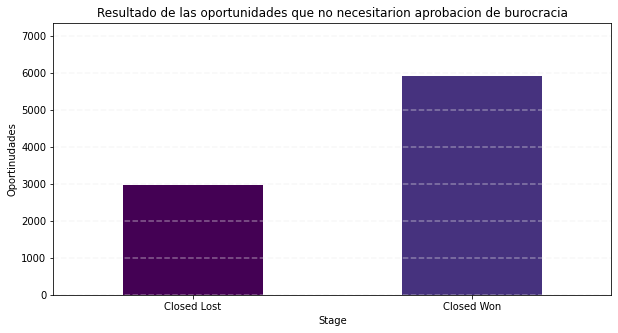

In [ ]:
graf4 = burocracia_no_o['Oportunidades'].plot(kind='bar', figsize=(10,5), rot=360, title='Resultado de las oportunidades que no necesitarion aprobacion de burocracia', color=colores)
ax = plt.gca()
ax.set_ylabel('Oportinudades')
ax.set_xlabel('Stage')
lineas = graf4.get_yticks()
for i in lineas:
      graf4.axhline(y=i, linestyle='--', alpha=0.4, color='#eeeeee')

In [ ]:
burocracia_aprobada = burocracia_si[burocracia_si['Bureaucratic_Code_0_Approved']== 1]
burocracia_aprobada

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/30/2016,6/13/2016,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.5200,USD,0.58817,5/1/2016,6/30/2016,2016 - 5,Q2,2016,NaT,10,EUR,5272800.00,EUR,5272800.0,Closed Lost,Prod_Category_A_None
7,27455,Americas,NW America,1,1,1,1,0,Bureaucratic_Code_4,4/21/2015,Source_7,United States,Account_Name_1794,Opportunity_Name_8227,7,None,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,12/9/2015,None,None,None,None,None,None,NaT,1/7/2016,12/9/2015,Person_Name_8,Product_Family_143,Product_Name_251,USD,0.4800,USD,0.48000,1/25/2016,1/25/2016,2016 - 1,Q1,2016,NaT,0,USD,50688.00,USD,50688.0,Closed Won,Prod_Category_A_None
23,28524,APAC,India,1,1,1,1,0,Bureaucratic_Code_4,10/13/2015,None,India,Account_Name_1147,Opportunity_Name_7036,11,25,Person_Name_60,Person_Name_49,Account_Type_2,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/9/2015,None,None,None,None,None,None,NaT,3/31/2016,1/7/2016,Person_Name_49,Product_Family_73,Product_Name_84,USD,0.5390,USD,0.53900,1/9/2016,1/15/2016,2016 - 1,Q1,2016,NaT,3,USD,1621851.00,USD,1621851.0,Closed Won,Prod_Category_A_None
62,18557,EMEA,Italy,1,1,1,1,0,Bureaucratic_Code_4,7/27/2013,Source_7,Italy,Account_Name_1067,Opportunity_Name_9078,19,None,Person_Name_2,Person_Name_39,Account_Type_0,Opportunity_Type_7,Non Binding,Delivery_Terms_2,12/9/2015,None,None,None,None,None,None,NaT,12/23/2015,10/28/2016,Person_Name_4,Product_Family_164,Product_Name_310,EUR,0.5500,USD,0.62210,4/11/2016,4/15/2016,2016 - 4,Q2,2016,NaT,0,EUR,259875.00,EUR,259875.0,Closed Lost,Prod_Category_A_None
69,17590,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,7/27/2013,Source_9,Germany,Account_Name_533,Opportunity_Name_7191,26,None,Person_Name_13,Person_Name_13,Account_Type_0,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/11/2015,None,None,None,None,None,None,NaT,1/14/2016,5/13/2017,Person_Name_13,Product_Family_115,Product_Name_168,EUR,0.3850,USD,0.43547,4/3/2017,5/26/2017,2017 - 4,Q2,2017,NaT,1,EUR,549780.00,EUR,549780.0,Closed Lost,Prod_Category_A_None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,8781,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,Source_7,Austria,Account_Name_726,Opportunity_Name_9245,12801,44,Person_Name_13,Person_Name_13,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/4/2015,None,None,None,None,None,None,NaT,NaT,1/19/2016,Person_Name_13,Product_Family_85,Product_Name_111,EUR,0.5200,USD,0.58817,3/21/2016,3/25/2016,2016 - 3,Q1,2016,NaT,0,EUR,103350.00,EUR,299715.0,Closed Won,Prod_Category_A_None
16943,8786,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,Source_7,Austria,Account_Name_726,Opportunity_Name_9245,12801,44,Person_Name_13,Person_Name_13,Account_Type_5,Opportunity_Type_1,Non

In [ ]:
burocracia_aprobada_o = burocracia_aprobada.groupby('Stage').agg({'ID':'count'})
burocracia_aprobada_o = burocracia_aprobada_o.rename(columns = {'ID':'Oportunidades'})
burocracia_aprobada_o.reset_index()

,Stage,Oportunidades
0,Closed Lost,2543
1,Closed Won,2818
2,Negotiation,17
3,Proposal,26


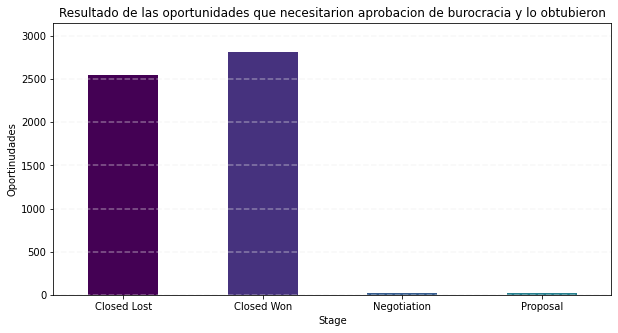

In [ ]:
graf5 = burocracia_aprobada_o['Oportunidades'].plot(kind='bar', figsize=(10,5), rot=360, title='Resultado de las oportunidades que necesitarion aprobacion de burocracia y lo obtubieron', color=colores)
ax = plt.gca()
ax.set_ylabel('Oportinudades')
ax.set_xlabel('Stage')
lineas = graf5.get_yticks()
for i in lineas:
      graf5.axhline(y=i, linestyle='--', alpha=0.4, color='#eeeeee')

In [ ]:
burocracia_desaprobada = burocracia_si[burocracia_si['Bureaucratic_Code_0_Approved']== 0]
burocracia_desaprobada

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_415,3,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,NaT,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53,2/1/2018,3/31/2018,2018 - 2,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_851,4,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,6/2/2017,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53,2/1/2018,2/28/2018,2018 - 2,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None
5,16802,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_939,5,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,6/2/2017,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53,2/1/2018,3/31/2018,2018 - 2,Q1,2018,NaT,28,USD,14838277.5,USD,14838277.5,Closed Lost,Prod_Category_A_None
6,16799,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_1618,6,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_4,12/8/2015,None,None,None,None,None,None,NaT,NaT,10/7/2016,Person_Name_8,Product_Family_164,Product_Name_308,USD,0.38,USD,0.38,2/1/2017,5/1/2017,2017 - 2,Q1,2017,NaT,7,USD,2659494.6,USD,2659494.6,Closed Lost,Prod_Category_A_None
78,4904,EMEA,UAE (Dubai),1,0,1,0,0,Bureaucratic_Code_5,12/8/2015,None,United Arab Emirates,Account_Name_583,Opportunity_Name_3913,30,None,Person_Name_39,Person_Name_39,None,Opportunity_Type_1,Non Binding,Delivery_Terms_1,12/14/2015,None,None,None,None,None,None,NaT,1/31/2016,1/9/2017,Person_Name_39,Product_Family_101,Product_Name_143,USD,0.57,USD,0.57,4/2/2016,6/30/2016,2016 - 4,Q2,2016,NaT,0,USD,7695.0,USD,7695.0,Closed Lost,Prod_Category_A_None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16845,28373,Americas,SE America,1,0,1,0,0,Bureaucratic_Code_5,9/25/2015,Source_7,United States,Account_Name_439,Opportunity_Name_5569,12759,None,Person_Name_46,Person_Name_12,Account_Type_2,Opportunity_Type_19,Non Binding,Delivery_Terms_4,11/30/2015,None,None,None,None,None,None,NaT,2/5/2016,3/2/2016,Person_Name_12,Product_Family_164,Product_Name_307,USD,0.64,USD,0.64,6/6/2016,9/2/2016,2016 - 6,Q2,2016,NaT,28,USD,18123840.0,USD,18123840.0,Closed Lost,Prod_Category_A_None
16846,28374,Americas,SE America,1,0,1,0,0,Bureaucratic_Code_5,9/25/2015,S

In [ ]:
burocracia_desaprobada_o =burocracia_desaprobada.groupby('Stage').agg({'ID':'count'})
burocracia_desaprobada_o = burocracia_desaprobada_o.rename(columns = {'ID':'Oportunidades'})
burocracia_desaprobada_o.reset_index()

,Stage,Oportunidades
0,Closed Lost,1846
1,Closed Won,787
2,Negotiation,1
3,Proposal,9
4,Qualification,11


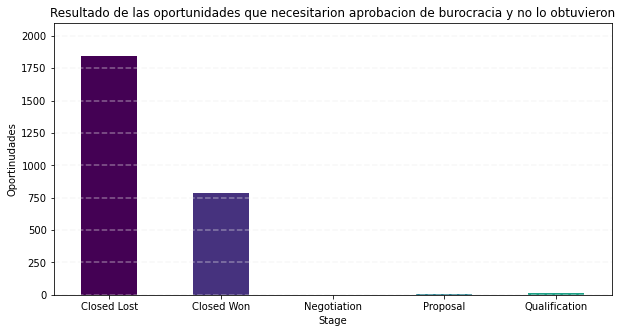

In [ ]:
graf6 = burocracia_desaprobada_o['Oportunidades'].plot(kind='bar', figsize=(10,5), rot=360, title='Resultado de las oportunidades que necesitarion aprobacion de burocracia y no lo obtuvieron', color=colores)
ax = plt.gca()
ax.set_ylabel('Oportinudades')
ax.set_xlabel('Stage')
lineas = graf6.get_yticks()
for i in lineas:
      graf6.axhline(y=i, linestyle='--', alpha=0.4, color='#eeeeee')

Todo junto:

In [ ]:
aprobada_necesita_burocracia = fue_aprobada[fue_aprobada['Bureaucratic_Code_0_Approval']==1]
aprobada_necesita_burocracia

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/30/2016,6/13/2016,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.5200,USD,0.58817,5/1/2016,6/30/2016,2016 - 5,Q2,2016,NaT,10,EUR,5272800.00,EUR,5272800.0,Closed Lost,Prod_Category_A_None
7,27455,Americas,NW America,1,1,1,1,0,Bureaucratic_Code_4,4/21/2015,Source_7,United States,Account_Name_1794,Opportunity_Name_8227,7,None,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,12/9/2015,None,None,None,None,None,None,NaT,1/7/2016,12/9/2015,Person_Name_8,Product_Family_143,Product_Name_251,USD,0.4800,USD,0.48000,1/25/2016,1/25/2016,2016 - 1,Q1,2016,NaT,0,USD,50688.00,USD,50688.0,Closed Won,Prod_Category_A_None
23,28524,APAC,India,1,1,1,1,0,Bureaucratic_Code_4,10/13/2015,None,India,Account_Name_1147,Opportunity_Name_7036,11,25,Person_Name_60,Person_Name_49,Account_Type_2,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/9/2015,None,None,None,None,None,None,NaT,3/31/2016,1/7/2016,Person_Name_49,Product_Family_73,Product_Name_84,USD,0.5390,USD,0.53900,1/9/2016,1/15/2016,2016 - 1,Q1,2016,NaT,3,USD,1621851.00,USD,1621851.0,Closed Won,Prod_Category_A_None
62,18557,EMEA,Italy,1,1,1,1,0,Bureaucratic_Code_4,7/27/2013,Source_7,Italy,Account_Name_1067,Opportunity_Name_9078,19,None,Person_Name_2,Person_Name_39,Account_Type_0,Opportunity_Type_7,Non Binding,Delivery_Terms_2,12/9/2015,None,None,None,None,None,None,NaT,12/23/2015,10/28/2016,Person_Name_4,Product_Family_164,Product_Name_310,EUR,0.5500,USD,0.62210,4/11/2016,4/15/2016,2016 - 4,Q2,2016,NaT,0,EUR,259875.00,EUR,259875.0,Closed Lost,Prod_Category_A_None
69,17590,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,7/27/2013,Source_9,Germany,Account_Name_533,Opportunity_Name_7191,26,None,Person_Name_13,Person_Name_13,Account_Type_0,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/11/2015,None,None,None,None,None,None,NaT,1/14/2016,5/13/2017,Person_Name_13,Product_Family_115,Product_Name_168,EUR,0.3850,USD,0.43547,4/3/2017,5/26/2017,2017 - 4,Q2,2017,NaT,1,EUR,549780.00,EUR,549780.0,Closed Lost,Prod_Category_A_None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,8781,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,Source_7,Austria,Account_Name_726,Opportunity_Name_9245,12801,44,Person_Name_13,Person_Name_13,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/4/2015,None,None,None,None,None,None,NaT,NaT,1/19/2016,Person_Name_13,Product_Family_85,Product_Name_111,EUR,0.5200,USD,0.58817,3/21/2016,3/25/2016,2016 - 3,Q1,2016,NaT,0,EUR,103350.00,EUR,299715.0,Closed Won,Prod_Category_A_None
16943,8786,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,Source_7,Austria,Account_Name_726,Opportunity_Name_9245,12801,44,Person_Name_13,Person_Name_13,Account_Type_5,Opportunity_Type_1,Non

In [ ]:
aprobada_y_burocracia = aprobada_necesita_burocracia[aprobada_necesita_burocracia['Bureaucratic_Code_0_Approved'] == 1]
aprobada_y_burocracia

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/30/2016,6/13/2016,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.5200,USD,0.58817,5/1/2016,6/30/2016,2016 - 5,Q2,2016,NaT,10,EUR,5272800.00,EUR,5272800.0,Closed Lost,Prod_Category_A_None
7,27455,Americas,NW America,1,1,1,1,0,Bureaucratic_Code_4,4/21/2015,Source_7,United States,Account_Name_1794,Opportunity_Name_8227,7,None,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,12/9/2015,None,None,None,None,None,None,NaT,1/7/2016,12/9/2015,Person_Name_8,Product_Family_143,Product_Name_251,USD,0.4800,USD,0.48000,1/25/2016,1/25/2016,2016 - 1,Q1,2016,NaT,0,USD,50688.00,USD,50688.0,Closed Won,Prod_Category_A_None
23,28524,APAC,India,1,1,1,1,0,Bureaucratic_Code_4,10/13/2015,None,India,Account_Name_1147,Opportunity_Name_7036,11,25,Person_Name_60,Person_Name_49,Account_Type_2,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/9/2015,None,None,None,None,None,None,NaT,3/31/2016,1/7/2016,Person_Name_49,Product_Family_73,Product_Name_84,USD,0.5390,USD,0.53900,1/9/2016,1/15/2016,2016 - 1,Q1,2016,NaT,3,USD,1621851.00,USD,1621851.0,Closed Won,Prod_Category_A_None
62,18557,EMEA,Italy,1,1,1,1,0,Bureaucratic_Code_4,7/27/2013,Source_7,Italy,Account_Name_1067,Opportunity_Name_9078,19,None,Person_Name_2,Person_Name_39,Account_Type_0,Opportunity_Type_7,Non Binding,Delivery_Terms_2,12/9/2015,None,None,None,None,None,None,NaT,12/23/2015,10/28/2016,Person_Name_4,Product_Family_164,Product_Name_310,EUR,0.5500,USD,0.62210,4/11/2016,4/15/2016,2016 - 4,Q2,2016,NaT,0,EUR,259875.00,EUR,259875.0,Closed Lost,Prod_Category_A_None
69,17590,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,7/27/2013,Source_9,Germany,Account_Name_533,Opportunity_Name_7191,26,None,Person_Name_13,Person_Name_13,Account_Type_0,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/11/2015,None,None,None,None,None,None,NaT,1/14/2016,5/13/2017,Person_Name_13,Product_Family_115,Product_Name_168,EUR,0.3850,USD,0.43547,4/3/2017,5/26/2017,2017 - 4,Q2,2017,NaT,1,EUR,549780.00,EUR,549780.0,Closed Lost,Prod_Category_A_None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,8781,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,Source_7,Austria,Account_Name_726,Opportunity_Name_9245,12801,44,Person_Name_13,Person_Name_13,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/4/2015,None,None,None,None,None,None,NaT,NaT,1/19/2016,Person_Name_13,Product_Family_85,Product_Name_111,EUR,0.5200,USD,0.58817,3/21/2016,3/25/2016,2016 - 3,Q1,2016,NaT,0,EUR,103350.00,EUR,299715.0,Closed Won,Prod_Category_A_None
16943,8786,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,Source_7,Austria,Account_Name_726,Opportunity_Name_9245,12801,44,Person_Name_13,Person_Name_13,Account_Type_5,Opportunity_Type_1,Non

In [ ]:
aprobada_y_burocracia_o = aprobada_y_burocracia.groupby('Stage').agg({'ID':'count'})
aprobada_y_burocracia_o = aprobada_y_burocracia_o.rename(columns = {'ID':'Oportunidades'})
aprobada_y_burocracia_o.reset_index()

,Stage,Oportunidades
0,Closed Lost,2528
1,Closed Won,2806
2,Negotiation,17
3,Proposal,26


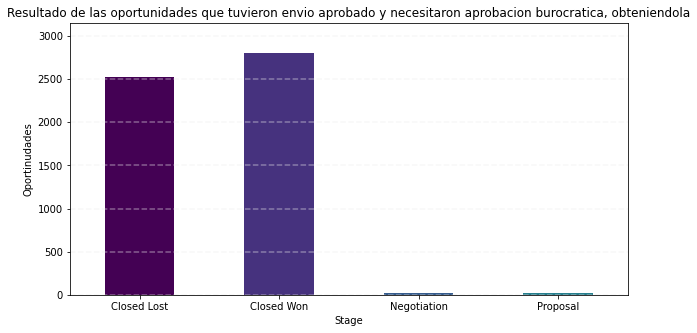

In [ ]:
graf7 = aprobada_y_burocracia_o['Oportunidades'].plot(kind='bar', figsize=(10,5), rot=360, title='Resultado de las oportunidades que tuvieron envio aprobado y necesitaron aprobacion burocratica, obteniendola', color=colores)
ax = plt.gca()
ax.set_ylabel('Oportinudades')
ax.set_xlabel('Stage')
lineas = graf7.get_yticks()
for i in lineas:
      graf7.axhline(y=i, linestyle='--', alpha=0.4, color='#eeeeee')

In [ ]:
aprobada_y_no_burocracia = aprobada_necesita_burocracia[aprobada_necesita_burocracia['Bureaucratic_Code_0_Approved'] == 0]
aprobada_y_no_burocracia

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
583,25678,Japan,None,1,1,1,0,0,Bureaucratic_Code_2,4/20/2015,None,Japan,Account_Name_1888,Opportunity_Name_11825,248,None,Person_Name_50,Person_Name_50,Account_Type_2,Opportunity_Type_7,Non Binding,Delivery_Terms_4,12/20/2016,None,None,None,None,None,None,NaT,3/27/2017,3/27/2017,Person_Name_50,Product_Family_127,Product_Name_210,JPY,51.0000,USD,0.45851,10/1/2017,12/31/2017,2017 - 10,Q4,2017,NaT,1,JPY,43605000.00,JPY,43605000.00,Closed Lost,Prod_Category_A_None
805,6450,APAC,India,1,1,1,0,0,Bureaucratic_Code_2,1/12/2017,None,India,Account_Name_1396,Opportunity_Name_9899,403,None,Person_Name_49,Person_Name_49,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,1/12/2017,None,None,None,None,None,None,NaT,3/31/2017,2/8/2018,Person_Name_47,Product_Family_164,Product_Name_306,USD,0.3450,USD,0.34500,2/6/2017,2/17/2017,2017 - 2,Q1,2017,NaT,2,USD,743989.05,USD,743989.05,Closed Lost,Prod_Category_A_None
848,23995,EMEA,United Kingdom,1,1,1,0,0,Bureaucratic_Code_2,4/7/2015,Source_2,Spain,Account_Name_677,Opportunity_Name_11959,436,None,Person_Name_2,Person_Name_23,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,1/16/2017,None,None,None,None,None,None,NaT,NaT,2/8/2018,Person_Name_47,Product_Family_77,Product_Name_99,EUR,0.3800,USD,0.42982,2/27/2017,3/15/2017,2017 - 2,Q1,2017,NaT,5,EUR,1899924.00,EUR,1899924.00,Closed Lost,Prod_Category_A_None
1144,7128,Middle East,None,1,1,1,0,0,Bureaucratic_Code_2,2/2/2017,None,United Arab Emirates,Account_Name_37,Opportunity_Name_2281,627,None,Person_Name_5,Person_Name_5,None,Opportunity_Type_1,Non Binding,Delivery_Terms_1,2/2/2017,None,None,None,None,None,None,NaT,2/15/2017,2/8/2018,Person_Name_47,Product_Family_79,Product_Name_89,USD,0.3800,USD,0.38000,9/1/2017,10/1/2017,2017 - 9,Q3,2017,NaT,0,USD,69160.00,USD,69160.00,Closed Lost,Prod_Category_A_None
1213,5545,EMEA,Germany,1,1,1,0,0,Bureaucratic_Code_2,1/2/2017,Source_7,Germany,Account_Name_2056,Opportunity_Name_2605,679,1696,Person_Name_4,Person_Name_4,Account_Type_2,Opportunity_Type_7,Non Binding,Delivery_Terms_4,2/8/2017,None,None,None,None,None,None,NaT,3/31/2017,9/26/2018,Person_Name_41,Product_Family_128,Product_Name_201,EUR,0.3675,USD,0.41568,4/1/2017,4/30/2017,2017 - 4,Q2,2017,NaT,1,EUR,314212.50,EUR,314212.50,Closed Won,Prod_Category_A_None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16303,28039,EMEA,None,1,1,1,0,0,Bureaucratic_Code_2,6/30/2015,None,United Kingdom,Account_Name_966,Opportunity_Name_5984,12487,None,Person_Name_18,Person_Name_20,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_2,6/30/2015,None,None,None,None,None,None,NaT,11/26/2015,11/27/2015,Person_Name_20,Product_Family_77,Product_Name_99,EUR,0.5400,USD,0.61079,2/1/2016,3/31/2016,2016 - 2,Q1,2016,NaT,4,EUR,2421900.00,EUR,2421900.00,Closed Lost,Prod_Category_A_None
16334,19011,EMEA,France,1,1,1,0,0,Bureaucratic_Code_2,2/10/2014,Source_7,Germany,Account_Name_991,Opportunity_Name_12618,12514,None,Person_Name_16,Person_Name_16,Account_Type_5,Op

In [ ]:
aprobada_y_no_burocracia_o = aprobada_y_no_burocracia.groupby('Stage').agg({'ID':'count'})
aprobada_y_no_burocracia_o = aprobada_y_no_burocracia_o.rename(columns = {'ID':'Oportunidades'})
aprobada_y_no_burocracia_o.reset_index()

,Stage,Oportunidades
0,Closed Lost,124
1,Closed Won,110


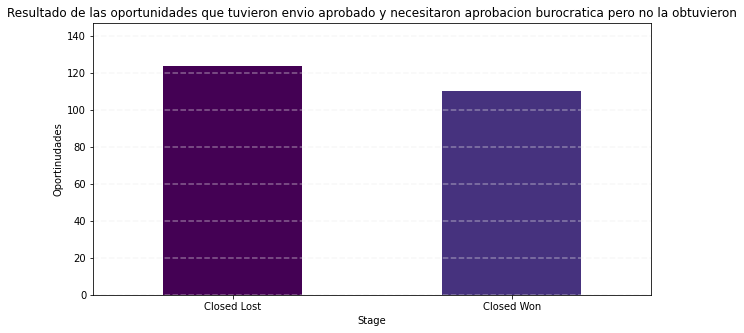

In [ ]:
graf8 = aprobada_y_no_burocracia_o['Oportunidades'].plot(kind='bar', figsize=(10,5), rot=360, title='Resultado de las oportunidades que tuvieron envio aprobado y necesitaron aprobacion burocratica pero no la obtuvieron', color=colores)
ax = plt.gca()
ax.set_ylabel('Oportinudades')
ax.set_xlabel('Stage')
lineas = graf8.get_yticks()
for i in lineas:
      graf8.axhline(y=i, linestyle='--', alpha=0.4, color='#eeeeee')